# Verification Example Notebook

This Notebook will show how to use the verification script by providing a few examples in order of increasing difficulty. Before you start I highly suggest at least skimming [README.md](https://github.com/OpenPrecincts/verification/blob/master/README.md)

In [1]:
import geopandas as gpd
import verify
import matplotlib.pyplot as plt

## Example #1 - The best case scenario

,JURIS,NAME,NUMBER,preid,G16RPRS,G16DPRS,G16PRELJoh,G16PREGSte,G16PREOth,G16USSRSze,...,G16H07RVau,G16H07DCum,G16H07GHoe,G16H07Oth,G16H08RCox,G16H08DRas,G16H08LWun,G16H08GWal,G16H08Oth,geometry
0,ALLE,ALLEGANY PRECINCT 01-000,01-000,ALLE-01-000,420,63,7,2,8,367,...,0,0,0,0,0,0,0,0,0,"POLYGON ((279387.444 229180.231, 279432.538 22..."
1,ALLE,ALLEGANY PRECINCT 02-000,02-000,ALLE-02-000,457,78,18,9,2,400,...,0,0,0,0,0,0,0,0,0,"POLYGON ((262891.921 216881.387, 263013.601 21..."


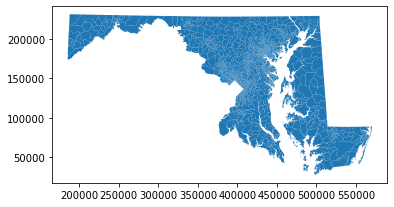

In [2]:
gdf = gpd.read_file('example-election-shapefiles/open-precincts-md-2016')
gdf.plot()
gdf.head(2)

Great - our election shapefile looks good because it has:
* election results at a precinct level with vote counts 
    * for Clinton (G16DPRS)
    * and Trump (G16DPRS)
* AND geometries for each precinct (geometry)

We need all the bullets above in order to use the verification script. Next we will apply verify.verify_state. It's docstring is as follows:

```
returns a complete (StateReport) object and a ((CountyReport) list) for the state.

:state_prec_gdf: (GeoDataFrame) containing precinct geometries and election results
:state_abbreviation: (str) e.g. 'MA' for Massachusetts
:source: (str) person or organization that made the 'state_prec_gdf' e.g 'VEST'
:year: (str) 'YYYY' indicating the year the election took place e.g. '2016'
:d_col: (str) denotes the column for Hillary Clinton vote counts in each precinct
:r_col: (str) denotes the column for Donald Trump vote counts in each precinct
:path: (str) filepath to which the report should be saved (if None it won't be saved)

d_col, r_col are optional - if they are not provided, 'get_party_cols' will be used
to guess based on comparing each column in state_prec_gdf to the expected results.
```

Pro tip: If you want to view a docstring in Jupyter Notebooks just type hit `shift-tab` after the name of the function for which you want to see the docstring. 

In [3]:
state_report, county_report_lst = verify.verify_state(gdf, 'MD', 'OP', '2016')

d_col :  G16DPRS
r_col :  G16RPRS
GerryChain graph created


It's normal for the cell above this one to take a while - normally a few minutes, but even hours in extreme cases. It  depends on the complexity of the state shapefile.

Now that it's finished, let's inspect the reports it returned.

In [4]:
vars(state_report)

{'abbreviation': 'MD',
 'all_precincts_have_a_geometry': True,
 'can_use_gerrychain': True,
 'can_use_maup': True,
 'county_vote_score_dispersion': 0.0,
 'fips': '24',
 'median_county_area_difference_score': 0.03006844281656984,
 'n_two_party_votes_expected': 2621097.0,
 'n_two_party_votes_observed': 2621097,
 'n_votes_democrat_expected': 1677928.0,
 'n_votes_democrat_observed': 1677928,
 'n_votes_republican_expected': 943169.0,
 'n_votes_republican_observed': 943169,
 'name': 'Maryland',
 'source': 'OP',
 'vote_score': 1.0,
 'worst_county_area_difference_score': 0.2299505502474189,
 'worst_county_vote_score': 1.0,
 'year': '2016'}

In [5]:
vars(county_report_lst[0])

{'area_difference_score': 0.0031263336157248177,
 'geoid': '24001',
 'n_two_party_votes_expected': 29145.0,
 'n_two_party_votes_observed': 29145,
 'n_votes_democrat_expected': 7875.0,
 'n_votes_democrat_observed': 7875,
 'n_votes_republican_expected': 21270.0,
 'n_votes_republican_observed': 21270,
 'name': 'Allegany County',
 'vote_score': 1.0}

In [6]:
len(county_report_lst)

24

Great - now let's use these report objects to render a markdown file. You can also do this with verify.verify_state by providing the optional arguement `path` 

In [7]:
report_file_path = 'open-precincts-maryland-2016'
verify.make_report(report_file_path, state_report, county_report_lst)

[Maryland's Report](https://github.com/OpenPrecincts/verification/blob/master/reports/mggg-vermont-2016.md)

## Example #2 - Manual GEOID Assignment

If the [GEOID column](https://github.com/OpenPrecincts/verification#geoid-county-assignment-for-each-precinct) is missing then the script will attempt to create it using the [MAUP package](https://github.com/mggg/maup#assigning-precincts-to-districts) to assign each precinct to the county which contains it. This election shapefile runs into trouble with MAUP

,STATEFP,COUNTYFP,VTDST,NAMELSAD,NAME,G16PRERTRU,G16PREDCLI,G16PRELJOH,G16PREGSTE,G16PREOFUE,...,G16USSRAYO,G16USSDHAS,G16USSLCHA,G16USSIDAY,G16USSOWRI,G16GOVRSUN,G16GOVDVAN,G16GOVLABR,G16GOVOWRI,geometry
0,33,001,ALTO01,TOWN OF ALTON Voting District,TOWN OF ALTON,2201,1152,115,24,2,...,2204,1192,49,69,0,2166,1163,135,14,"POLYGON Z ((-71.34362 43.62879 0.00000, -71.34..."
1,33,001,BARN01,TOWN OF BARNSTEAD Voting District,TOWN OF BARNSTEAD,1520,924,125,20,0,...,1454,1033,52,62,0,1454,1017,116,0,"POLYGON Z ((-71.34905 43.34658 0.00000, -71.34..."


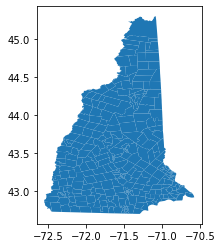

In [8]:
gdf = gpd.read_file('example-election-shapefiles/vest-nh-2016')
gdf.plot()
gdf.head(2)

In [9]:
state_report, county_report_lst = verify.verify_state(gdf, 'NH', 'VEST', '2016')

d_col :  G16PREDCLI
r_col :  G16PRERTRU
GerryChain graph created


AssertionError: 

This assertion error is telling us that we are missing a GEOID column and the script was unable to assign it automatically. Luckily, this NH GeoDataFrame already has the two consitutents of a GEOID:
* STATEFP
* COUNTFP

So we can create a GEOID column manually like so:

In [10]:
gdf['GEOID'] = gdf['STATEFP'].map(str) + gdf['COUNTYFP'].map(str)
gdf.GEOID.head(5)

0    33001
1    33001
2    33001
3    33001
4    33001
Name: GEOID, dtype: object

In [11]:
report_file_path = 'vest-new-hampshire-2016'
state_report, county_report_lst = verify.verify_state(gdf, 'NH', 'VEST', '2016',path=report_file_path)

d_col :  G16PREDCLI
r_col :  G16PRERTRU
GerryChain graph created


[New Hampshire's Report](https://github.com/OpenPrecincts/verification/blob/master/reports/vest-new-hampshire-2016.md)

In a less trivial case, you may have the county names, but not their FIPS code. Let's consider VEST's Washington 2016:

,LEGDIST,CONGDIST,CCDIST,COUNTY,COUNTYCODE,PRECCODE,PRECNAME,ST_CODE,G16PREDCLI,G16PRERTRU,...,G16TRERDAV,G16AUDDMCC,G16AUDRMIL,G16ATGDFER,G16ATGRTRU,G16LNDDFRA,G16LNDRMCL,G16INSDKRE,G16INSRSCH,geometry
0,9,4,1,Adams,AD,111,Ritzville Ward 1,AD00000111,24,109,...,81,45,92,57,66,27,107,40,89,"POLYGON ((2169598.057 664568.324, 2169604.801 ..."
1,9,4,1,Adams,AD,112,Ritzville Ward 2,AD00000112,26,96,...,65,35,87,66,51,30,92,40,84,"POLYGON ((2170310.521 663414.822, 2170266.610 ..."


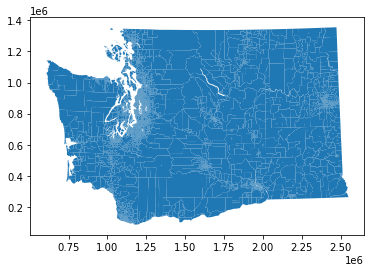

In [12]:
gdf = gpd.read_file('example-election-shapefiles/vest-wa-2016')
gdf.plot()
gdf.head(2)

In [13]:
from reference_data import state_fip_to_county_to_geoid
washington_state_fips_code = 53
geoid_to_county_name = state_fip_to_county_to_geoid[53]
geoid_to_county_name

{'Adams County': '53001',
 'Asotin County': '53003',
 'Benton County': '53005',
 'Chelan County': '53007',
 'Clallam County': '53009',
 'Clark County': '53011',
 'Columbia County': '53013',
 'Cowlitz County': '53015',
 'Douglas County': '53017',
 'Ferry County': '53019',
 'Franklin County': '53021',
 'Garfield County': '53023',
 'Grant County': '53025',
 'Grays Harbor County': '53027',
 'Island County': '53029',
 'Jefferson County': '53031',
 'King County': '53033',
 'Kitsap County': '53035',
 'Kittitas County': '53037',
 'Klickitat County': '53039',
 'Lewis County': '53041',
 'Lincoln County': '53043',
 'Mason County': '53045',
 'Okanogan County': '53047',
 'Pacific County': '53049',
 'Pend Oreille County': '53051',
 'Pierce County': '53053',
 'San Juan County': '53055',
 'Skagit County': '53057',
 'Skamania County': '53059',
 'Snohomish County': '53061',
 'Spokane County': '53063',
 'Stevens County': '53065',
 'Thurston County': '53067',
 'Wahkiakum County': '53069',
 'Walla Walla Co

In [14]:
gdf['GEOID'] = gdf['COUNTY'].apply(lambda x: geoid_to_county_name[x + " County"])
print(gdf.GEOID.unique())
gdf.head(2)

['53001' '53003' '53005' '53007' '53009' '53011' '53013' '53015' '53017'
 '53019' '53021' '53023' '53025' '53027' '53029' '53031' '53033' '53035'
 '53041' '53043' '53045' '53047' '53051' '53055' '53057' '53059' '53061'
 '53063' '53065' '53067' '53069' '53071' '53075' '53077' '53053' '53073'
 '53049' '53039' '53037']


,LEGDIST,CONGDIST,CCDIST,COUNTY,COUNTYCODE,PRECCODE,PRECNAME,ST_CODE,G16PREDCLI,G16PRERTRU,...,G16AUDDMCC,G16AUDRMIL,G16ATGDFER,G16ATGRTRU,G16LNDDFRA,G16LNDRMCL,G16INSDKRE,G16INSRSCH,geometry,GEOID
0,9,4,1,Adams,AD,111,Ritzville Ward 1,AD00000111,24,109,...,45,92,57,66,27,107,40,89,"POLYGON ((2169598.057 664568.324, 2169604.801 ...",53001
1,9,4,1,Adams,AD,112,Ritzville Ward 2,AD00000112,26,96,...,35,87,66,51,30,92,40,84,"POLYGON ((2170310.521 663414.822, 2170266.610 ...",53001


Now Washington has a GEOID column and can be run through the verification script.

## Example #3 - Manual Candidate Column Selection
The script needs to know which column contains votes for Clinton and which column contains votes for Trump. They can be manually entered as arguments:

* `d_col` denotes the column for Hillary Clinton vote counts in each precinct
* `r_col` denotes the column for Donald Trump vote counts in each precinct.

Without those arguments, the script will guess based on the expected number of votes for each candidate.

,STATEFP10,COUNTYFP10,COUSUBFP10,GEOID10,NAME10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,TOTV14,PRES12D,PRES12R,PRES12L,TOTV12,SEN12B,SEN12R,USH12D,USH12R,geometry
0,50,005,62200,5000562200,St. Johnsbury,St. Johnsbury town,94250348,917562,+44.4603077,-072.0049436,...,"1,960","1,789","1,081",29,"2,968","1,909",583,"1,918",814,"POLYGON ((-71.99365 44.49649, -71.99262 44.496..."
1,50,005,64075,5000564075,Sheffield,Sheffield town,84217719,667553,+44.6416305,-072.1100750,...,182,182,93,4,289,200,66,190,62,"POLYGON ((-72.15832 44.60817, -72.15881 44.608..."


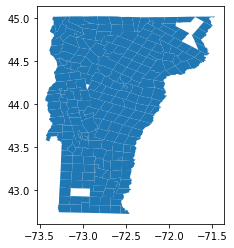

In [15]:
gdf = gpd.read_file('example-election-shapefiles/mggg-vt-2016')
gdf.plot()
gdf.head(2)

In [16]:
report_file_path = 'mggg-vermont-2016'
state_report, county_report_lst = verify.verify_state(gdf, 'VT', 'MGGG', '2016',path=report_file_path)

Please manually select the Democrat candidate votes column by index: 
[0] PRES16B e.g. 164
[1] PRES16L e.g. 125
[2] PRES16G e.g. 64
[3] N/A (no county)
Select the column (by index): 3


Exception: Unable to find a suitable column

None of those look right, so we will have to pass the correct columns as arguements.

In [17]:
gdf.columns

Index(['STATEFP10', 'COUNTYFP10', 'COUSUBFP10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'TOTPOP', 'WHITE', 'BLACK', 'AMIN', 'ASIAN', 'NHPI', 'OTHER', '2MORE',
       'VAP', 'HISP', 'SENDIST', 'DISTNAME', 'PRES16D', 'PRES16R', 'PRES16B',
       'PRES16L', 'PRES16G', 'TOTV16', 'SEN16D', 'SEN16R', 'USH14D', 'USH14R',
       'TOTV14', 'PRES12D', 'PRES12R', 'PRES12L', 'TOTV12', 'SEN12B', 'SEN12R',
       'USH12D', 'USH12R', 'geometry'],
      dtype='object')

In [18]:
d_col = 'PRES16D'
r_col = 'PRES16R'
state_report, county_report_lst = verify.verify_state(gdf, 'VT', 'MGGG', '2016', d_col=d_col, r_col=r_col, path=report_file_path)

GerryChain graph created


[Vermont Report](https://github.com/OpenPrecincts/verification/blob/master/reports/mggg-vermont-2016.md)

That's it! You may need to combine the method used in example 2 and example 3 in some cases, but hopefully most states will work like example #1. Happy Verifying :)